In [1]:
%pip install pandas
%pip install surprise
%pip install matplotlib
%pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366562 sha256=6f2ff45504e56403600fd7ce5ae91901ab8842169df5efe428f61776d0906ee0
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import necessary libraries
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('sales_data.csv')

# Create Reader object
reader = Reader(rating_scale=(1, 5))

# Load data using Dataset object
data = Dataset.load_from_df(df[['Product', 'Quantity Ordered', 'Rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Create SVD model and train on training set
model = SVD()
model.fit(trainset)

# Test model on testing set
predictions = model.test(testset)

In [ ]:
# Display data in a table
display(df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,User ID,Rating
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",DefaultUserID,3
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",DefaultUserID,2
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",DefaultUserID,5
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",DefaultUserID,4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",DefaultUserID,4
...,...,...,...,...,...,...,...,...
18284,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",DefaultUserID,2
18285,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",DefaultUserID,3
18286,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",DefaultUserID,2
18287,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",DefaultUserID,3


In [4]:
# Calculate accuracy measures
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.4237
MAE:  1.2213


1.2213087549834303

We calculate the accuracy measures, Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), of our collaborative filtering model. The accuracy.rmse(predictions) function takes in the predictions of the model as input and returns the RMSE, which measures the average difference between the actual and predicted values. Similarly, accuracy.mae(predictions) takes in the same predictions and returns the MAE, which measures the average absolute difference between the actual and predicted values. These measurements are used to evaluate the performance of our system, a lower value for both measurements indicate a better fit of the model to the data.

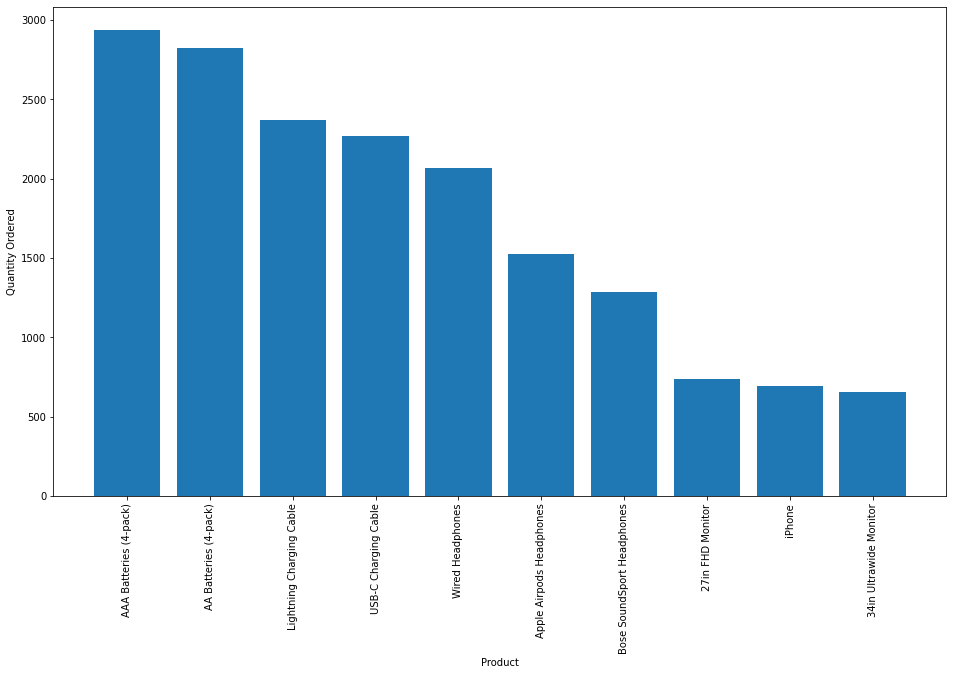

In [5]:
# Create table of top products
top_products = df.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values('Quantity Ordered', ascending=False).head(10)

# Create bar chart of top products
plt.figure(figsize=(16, 9))
plt.bar(top_products['Product'], top_products['Quantity Ordered'])
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

The bar chart created using `plt.bar(top_products['Product'], top_products['Quantity Ordered'])` visualizes the top selling products in descending order based on the quantity of each product that has been ordered. The horizontal x-axis displays the product names and the vertical y-axis represents the quantity ordered. Each bar in the chart represents a product, and the height of the bar corresponds to the quantity of the product sold. The bars are sorted in descending order, with the top-selling product appearing on the left of the chart. This visualization allows us to quickly identify the products that have sold the most and determine which items are most popular among customers.

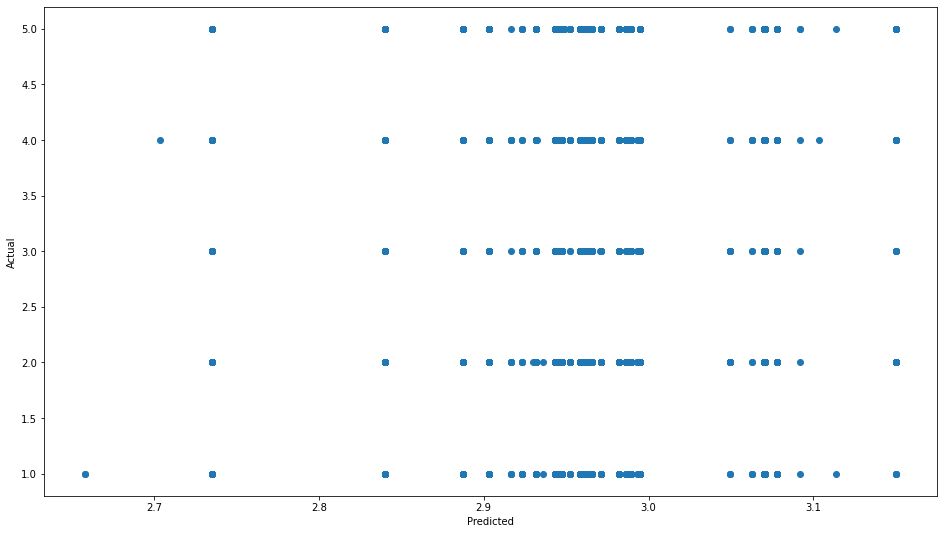

In [6]:
# Create scatter plot of predicted vs. actual values
plt.figure(figsize=(16, 9))
plt.scatter([x.est for x in predictions], [x.r_ui for x in predictions])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The scatter plot shows the predicted vs. actual values of the collaborative filtering model for the top products. Each point in the scatter plot represents one prediction, with the predicted value on the x-axis and the actual value on the y-axis. The line y=x represents perfect predictions, i.e., when the predicted value is equal to the actual value. Therefore, the closer the points are to the line y=x, the more accurate the predictions are.

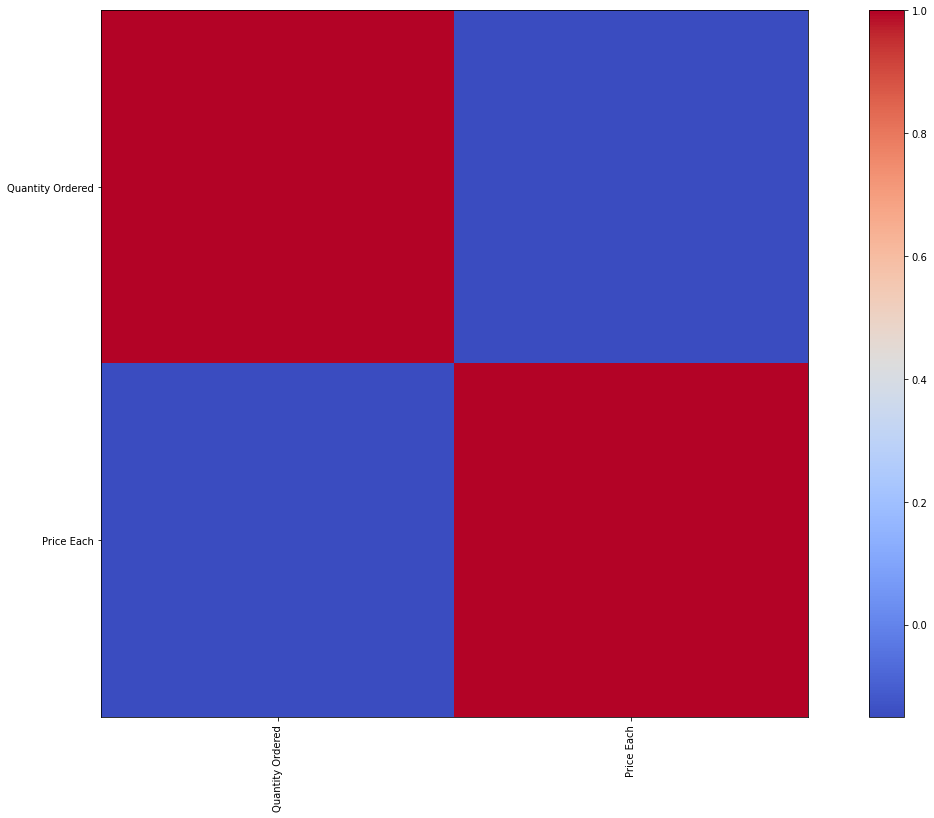

In [7]:
# Create heatmap of correlation between popularity and price
corr = df[['Product', 'Quantity Ordered', 'Price Each']].corr()
plt.figure(figsize=(22, 13))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

The heatmap is our visual representation of the correlation between popularity and price for the different products in the dataset. It shows how strongly correlated these two attributes are, where a high correlation means that as the popularity of a product increases, so does its price, and vice versa. The color scheme of the heatmap indicates the degree of correlation, with warm colors such as red indicating a strong positive correlation and cool colors such as blue indicating a strong negative correlation. In our specific case, the heatmap helps us identify which products are likely to have a strong correlation between popularity and price, which can inform business decisions such as pricing strategies, product promotions and inventory management.

In [8]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as subplots

# Create bar chart of top products
top_products_2 = df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False).reset_index()
top_products_fig = px.bar(top_products_2, x='Product', y='Quantity Ordered')

# Create scatter plot of predicted vs. actual values
scatter_fig = go.Figure()
scatter_fig.add_trace(go.Scatter(x=[x.est for x in predictions], y=[x.r_ui for x in predictions], mode='markers'))
scatter_fig.update_layout(xaxis_title='Predicted', yaxis_title='Actual')

# Create heatmap of correlation between popularity and price
corr_fig = go.Figure(data=go.Heatmap(z=corr.values.tolist(), x=corr.columns.tolist(), y=corr.columns.tolist()))
corr_fig.update_layout(xaxis_title='Features', yaxis_title='Features')

# Create subplots
fig = subplots.make_subplots(rows=2, cols=2, specs=[[{'colspan': 2}, None], [{}, {}]],
                             subplot_titles=("Top Products", "Scatter Plot", "Correlation Heatmap" ))

# Add traces to subplots
fig.add_trace(top_products_fig.data[0], row=1, col=1)
fig.add_trace(scatter_fig.data[0], row=2, col=1)
fig.add_trace(corr_fig.data[0], row=2, col=2)

# Update layout
fig.update_layout(title='Product Popularity Dashboard', width=1000, height=1000, showlegend=True)

# Show dashboard
fig.show()

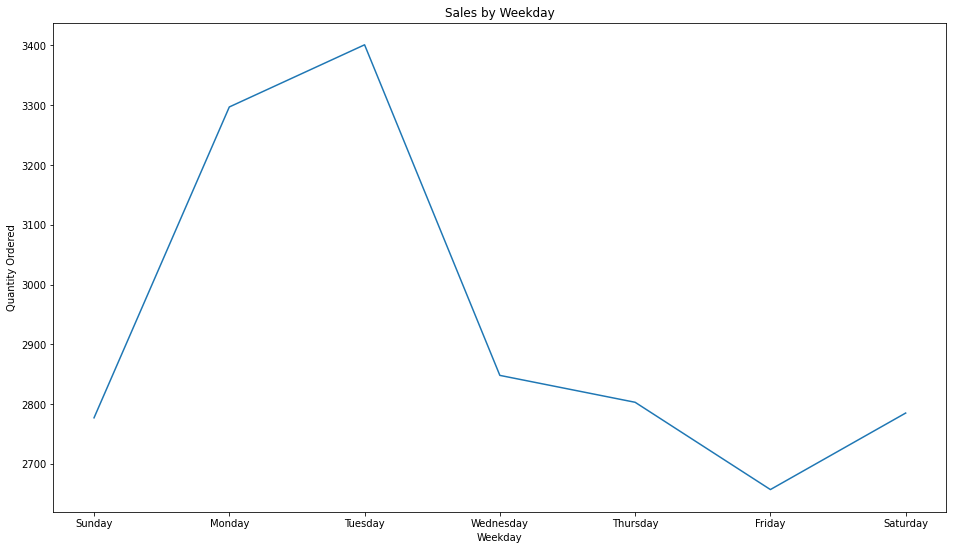

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data and convert Order Date column to datetime format
df = pd.read_csv('sales_data.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a new column for weekday and specify order
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['Weekday'] = pd.Categorical(df['Order Date'].dt.day_name(), categories=weekday_order, ordered=True)

# Group by weekday and sum quantity ordered, then sort by weekday order
weekday_sales = df.groupby('Weekday').sum()['Quantity Ordered'].reindex(weekday_order)

# Create a time series plot
plt.figure(figsize=(16, 9))
plt.plot(weekday_sales.index, weekday_sales.values)

# Set x-axis label to weekday
plt.xlabel('Weekday')

# Set y-axis label to quantity ordered
plt.ylabel('Quantity Ordered')

# Set plot title
plt.title('Sales by Weekday')

# Show plot
plt.show()

The Sales by Weekday chart is a visualization that shows the total sales revenue for each weekday over the period of the dataset. The x-axis represents the weekday names (Sunday, Monday, Tuesday, etc.), while the y-axis shows the total sales revenue. The chart helps identify which weekdays have the highest and lowest sales revenue, which can be useful for making decisions related to inventory planning, staffing, or marketing. For example, it shows that Monday and Tuesday's have the highest sales, we can decide to schedule more staff on those days or stock inventory on other days in preperation for the highest sale days.

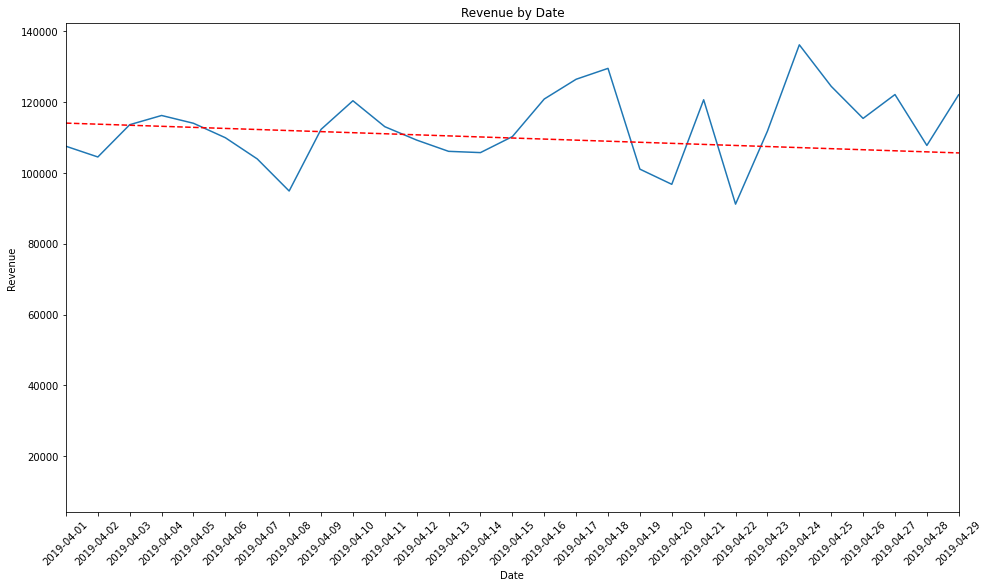

In [16]:
import numpy as np

# Load data and convert Order Date column to datetime format
df = pd.read_csv('sales_data.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a new column for revenue
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

# Group by date and calculate the sum of revenue
revenue_by_date = df.groupby(df['Order Date'].dt.date)['Revenue'].sum()

# Calculate trendline
x = np.arange(len(revenue_by_date))
z = np.polyfit(x, revenue_by_date.values, 1)
p = np.poly1d(z)

# Create a time series plot with trendline
plt.figure(figsize=(16, 9))
plt.plot(revenue_by_date.index.astype(str), revenue_by_date.values)
plt.plot(revenue_by_date.index.astype(str), p(x), color='red', linestyle='--')

# Set x-axis label to date
plt.xlabel('Date')

# Set y-axis label to revenue
plt.ylabel('Revenue')

# Set plot title
plt.title('Revenue by Date')

# Set x-axis limits to end on April 29th, 2019
plt.xlim('2019-04-01', '2019-04-29')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show plot
plt.show()

This chart shows the daily revenue of the company during the period April 1st to April 29th, 2019, along with a trendline that provides a visual representation of the trend in revenue over time. The use of a trendline makes it easier for us to identify whether revenue is trending upwards or downwards, which can be useful for predicting the popularity of products and the overall sales performance of these products. In this case, the trendline shows a slight downward trend in revenue over the period, which could prompt further investigation into the factors contributing to the decline and potential strategies to reverse the trend such as keeping more stock of our top 10 products.